In [2]:
# Usual imports
import pandas as pd
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# if your Jupyter kernel crashes during this code, use this setting
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from ydata_profiling import ProfileReport

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from fancyimpute import KNN

In [3]:
# Read csv file into dataframe
df = pd.read_csv("merged_starwis_and_weather.csv")

df.head()

,Unnamed: 0,ts,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
0,0,2021-04-16 03:44:00,-1.1,77.0,-4.6,0,0.82,-0.540917,0.0
1,1,2021-04-16 03:54:00,-1.2,78.0,-4.6,0,0.82,-0.675011,0.0
2,2,2021-04-16 04:04:00,-1.2,78.0,-4.6,0,0.82,-1.025955,0.0
3,3,2021-04-16 04:14:00,-1.3,78.0,-4.7,0,0.82,-0.810654,0.0
4,4,2021-04-16 04:24:00,-1.4,78.0,-4.7,0,0.82,-1.016840,0.0


In [4]:
df.describe()

,Unnamed: 0,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
count,175763.000000,175763.000000,175763.000000,175763.000000,175763.000000,175763.000000,175763.000000,175763.000000
mean,90826.086793,6.609439,78.311163,2.440079,0.474719,0.733461,7.863291,0.056850
std,52540.639569,10.558561,19.071367,9.167568,1.200173,0.149043,11.779157,0.172762
min,0.000000,-30.400000,17.000000,-33.500000,0.000000,0.100005,-24.663725,0.000000
25%,45567.500000,-1.000000,66.000000,-3.900000,0.000000,0.698973,-0.963745,0.000000
50%,90747.000000,7.000000,85.000000,2.600000,0.000000,0.820000,6.825300,0.000000
75%,136094.500000,15.100000,93.000000,10.100000,0.000000,0.820000,16.405979,0.063648
max,181570.000000,32.200000,100.000000,21.100000,6.000000,0.820000,68.614548,6.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'ts', 'airTemp', 'humidity', 'dewpoint', 'precipitation',
       'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm'],
      dtype='object')

In [6]:
# No missing values for the merged datasets 
df.isnull().sum()

Unnamed: 0                  0
ts                          0
airTemp                     0
humidity                    0
dewpoint                    0
precipitation               0
Friction                    0
Road_Surface_Temperature    0
Water_Film_Surface_mm       0
dtype: int64

In [7]:
# Y-data profiling report generation.
# Generate the data profiling report, title is just
report = ProfileReport(df, title='Marwis Kesa Overview')

# create either an HTML -page or show it straight in the notebook

report.to_file("Merged_Ydatareport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Check the correleation matrix
import pandas as pd
df = pd.read_csv("merged_starwis_and_weather.csv")
df = df.drop(["Unnamed: 0","ts"], axis = 1)

correlation_matrix = df.corr()
target_corr = correlation_matrix["Friction"].sort_values(ascending=False)
print(target_corr)

Friction                    1.000000
airTemp                     0.631863
Road_Surface_Temperature    0.604126
dewpoint                    0.553294
humidity                   -0.369105
precipitation              -0.416292
Water_Film_Surface_mm      -0.424988
Name: Friction, dtype: float64


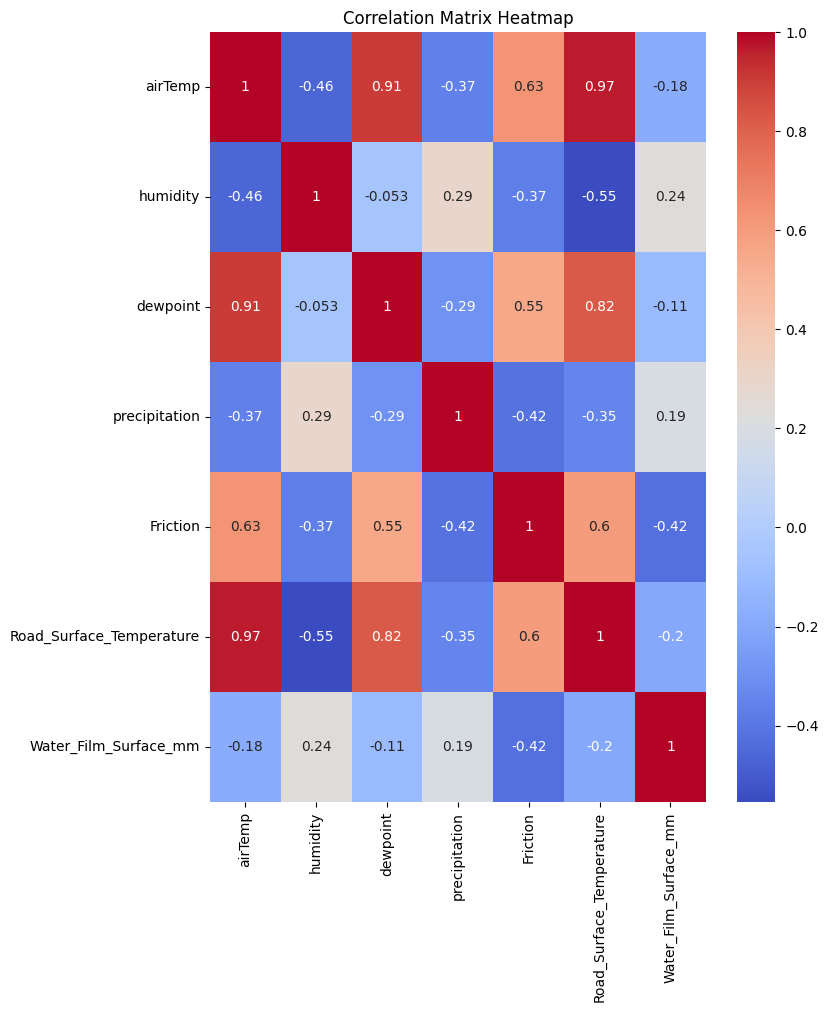

In [9]:
# Visualize the correlation
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

<h2>Overlaps and Redundancy</h2>
According to this correlation above I can't consider any of the variables redundant because they are all unique to each other.

But the correlation between Dewpoint and airTemp is 91%

The correlation between Road_Surface_Temperature and AirTemp is 97% this significant amount of correlation can actually signify redundancy

There's an overlap between Air temp and Road_Surface_Temperature

<h2>Noises</h2>

This datasets do not have a lot of noise in it most of the value are close to the average or the values make up the average.

The only column I could consider that has noise is dew point at the far left of its distribution

The precipitation column has 82% zero values I think it's best to drop the column

The Water_Film_Surface_mm has over 57% of zero values. I would take that as missing values and I'd try to fill it.

![Screenshot 2024-11-11 at 9.43.54 PM.png](<attachment:Screenshot 2024-11-11 at 9.43.54 PM.png>)
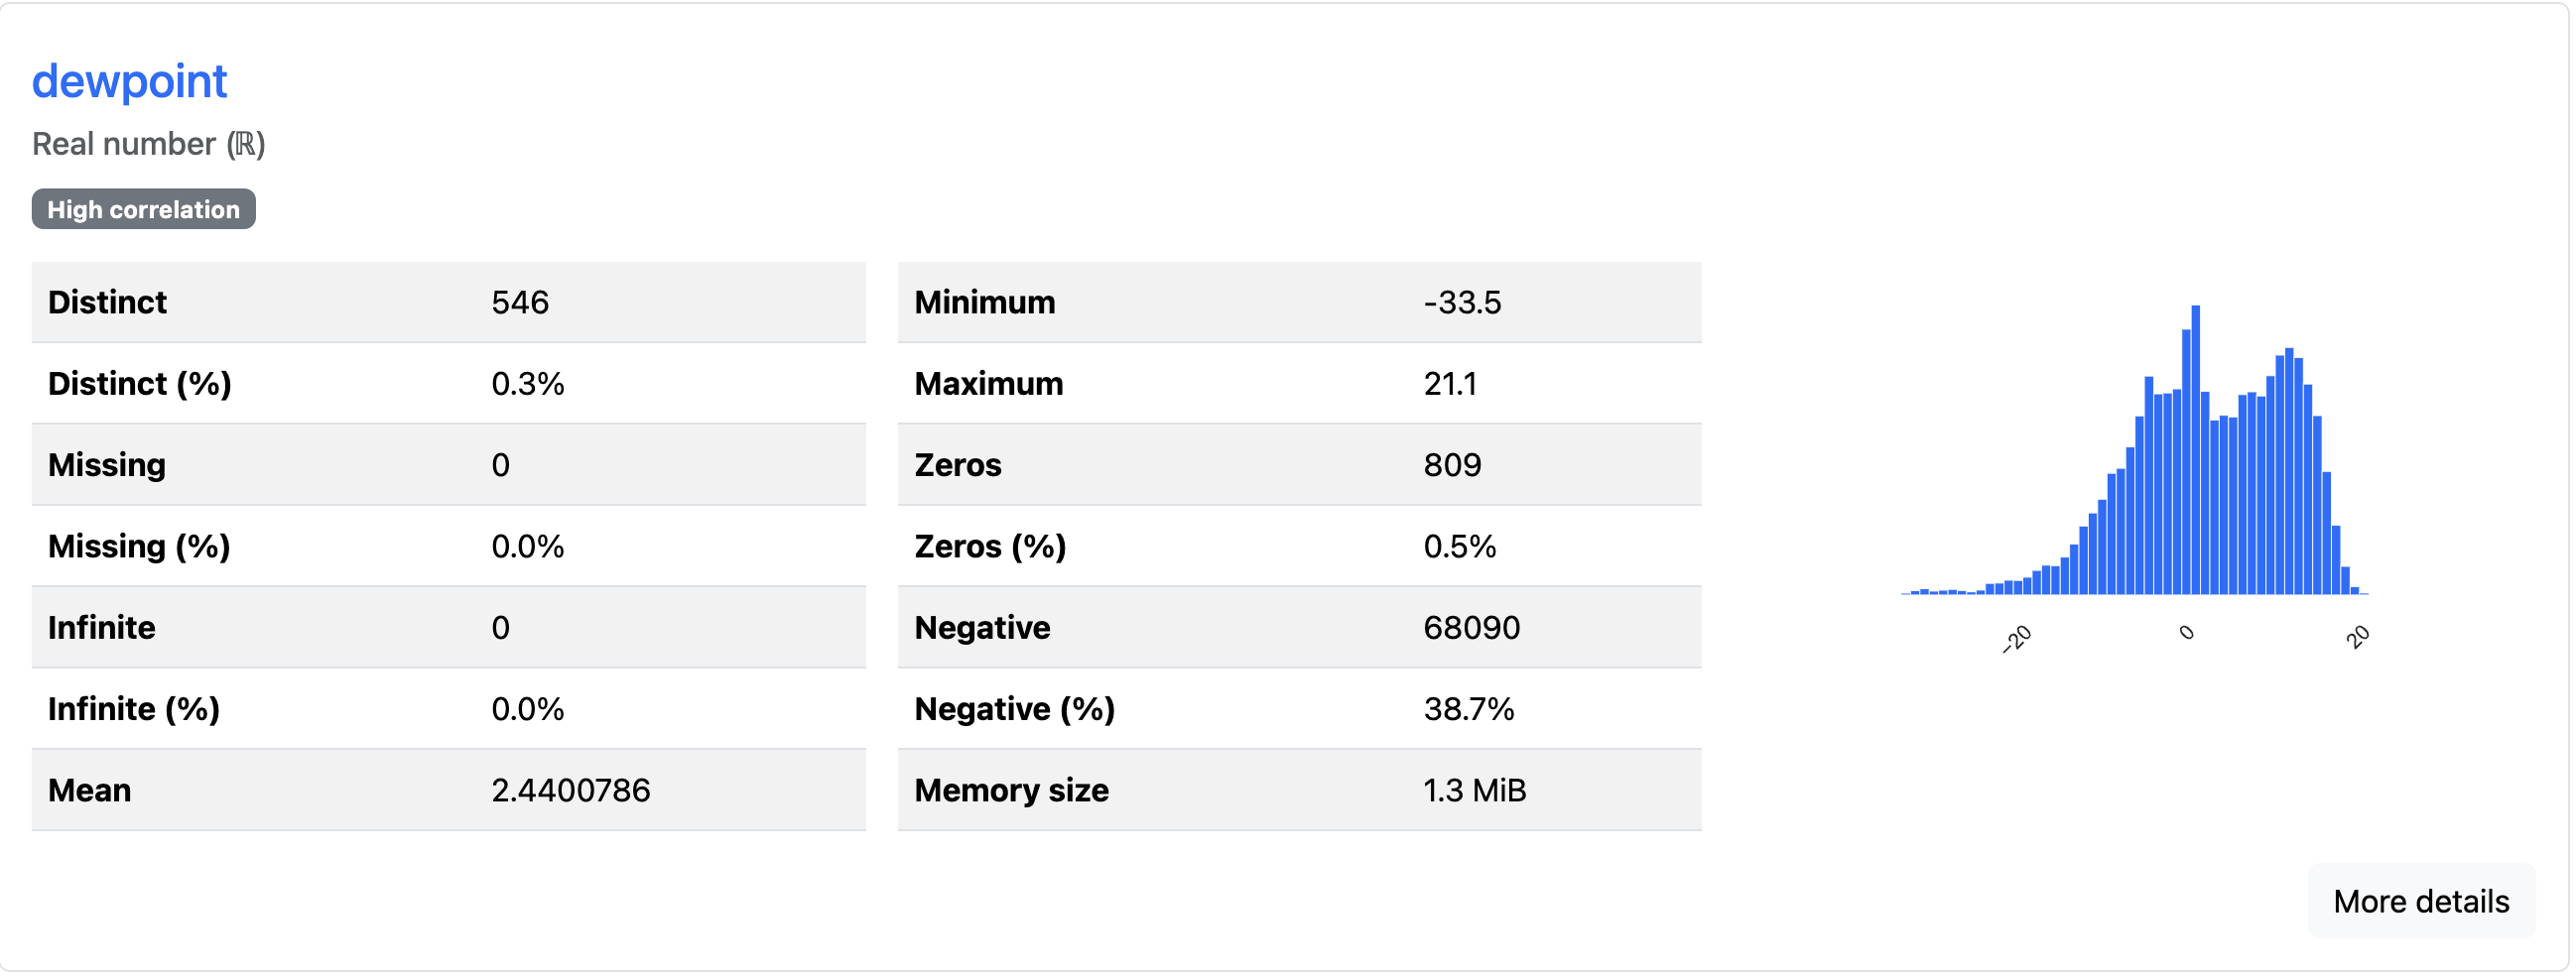

In [10]:
df

,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
0,-1.1,77.0,-4.6,0,0.82,-0.540917,0.0
1,-1.2,78.0,-4.6,0,0.82,-0.675011,0.0
2,-1.2,78.0,-4.6,0,0.82,-1.025955,0.0
3,-1.3,78.0,-4.7,0,0.82,-0.810654,0.0
4,-1.4,78.0,-4.7,0,0.82,-1.016840,0.0
...,...,...,...,...,...,...,...
175758,3.1,92.0,1.8,0,0.82,3.329551,0.0
175759,3.3,91.0,2.0,0,0.82,3.236671,0.0
175760,3.4,93.0,2.3,0,0.82,2.907525,0.0
175761,3.4,94.0,2.5,0,0.82,3.431610,0.0


In [11]:
df.columns

Index(['airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm'],
      dtype='object')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# cale only relevant variables
num_cols = ['airTemp', 'humidity', 'dewpoint', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm']
df[num_cols] = scaler.fit_transform(df[num_cols])

df

,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
0,0.468051,0.722892,0.529304,0,1.0,0.258611,0.0
1,0.466454,0.734940,0.529304,0,1.0,0.257174,0.0
2,0.466454,0.734940,0.529304,0,1.0,0.253411,0.0
3,0.464856,0.734940,0.527473,0,1.0,0.255719,0.0
4,0.463259,0.734940,0.527473,0,1.0,0.253509,0.0
...,...,...,...,...,...,...,...
175758,0.535144,0.903614,0.646520,0,1.0,0.300105,0.0
175759,0.538339,0.891566,0.650183,0,1.0,0.299109,0.0
175760,0.539936,0.915663,0.655678,0,1.0,0.295581,0.0
175761,0.539936,0.927711,0.659341,0,1.0,0.301199,0.0


In [13]:
# pip install phik
import phik
import pandas as pd

# load data
df = pd.read_csv("merged_starwis_and_weather.csv")

# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['Unnamed: 0', 'airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm']


/Users/ziips/Downloads/ML_project/.venv/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable ts is large: 175763. Are you sure this is not an interval variable? Analysis for pairs of variables including ts can be slow.
  warnings.warn(


,Unnamed: 0,ts,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
Unnamed: 0,1.000000,1.0,0.707624,0.457385,0.692584,0.259846,0.570448,0.705501,0.090839
ts,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
airTemp,0.707624,1.0,1.000000,0.594135,0.946116,0.389744,0.716914,0.944197,0.119001
humidity,0.457385,1.0,0.594135,1.000000,0.407474,0.302781,0.422843,0.628174,0.125960
dewpoint,0.692584,1.0,0.946116,0.407474,1.000000,0.326101,0.661892,0.873472,0.151315
precipitation,0.259846,1.0,0.389744,0.302781,0.326101,1.000000,0.412106,0.345745,0.197191
Friction,0.570448,1.0,0.716914,0.422843,0.661892,0.412106,1.000000,0.698204,0.383817
Road_Surface_Temperature,0.705501,1.0,0.944197,0.628174,0.873472,0.345745,0.698204,1.000000,0.115472
Water_Film_Surface_mm,0.090839,1.0,0.119001,0.125960,0.151315,0.197191,0.383817,0.115472,1.000000


interval columns not set, guessing: ['airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm']


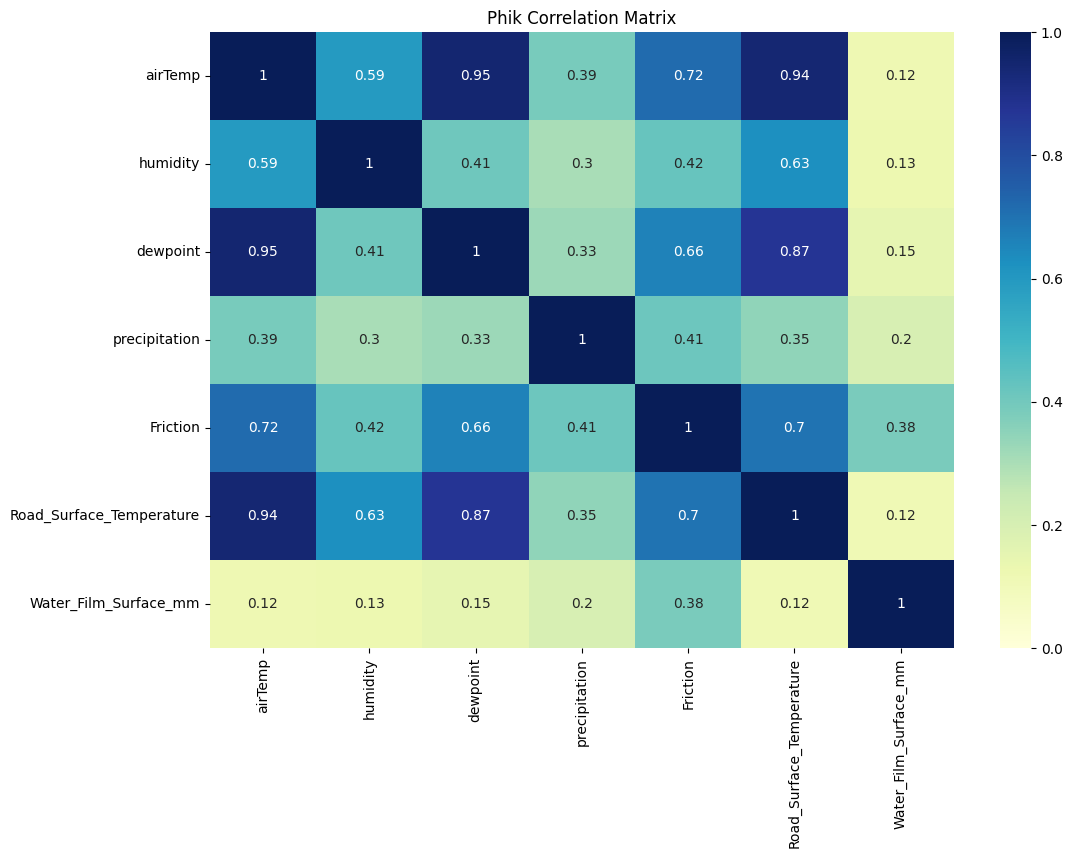

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix

# Load data
df = pd.read_csv("merged_starwis_and_weather.csv")
df = df.drop(["Unnamed: 0","ts"], axis = 1)

# Compute phik-matrix values
phik_matrix = df.phik_matrix()

# Set up the plot size
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap to plot the matrix
sns.heatmap(phik_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar=True)
plt.title("Phik Correlation Matrix")
plt.show()

In [15]:
# to see the visualizations instead, try this
# remember to change the target variable based on your own dataset
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
report = AV.AutoViz("starwis_satamakatu.csv", chart_format="bokeh", depVar="Friction")

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    max_rows_analyzed is smaller than dataset shape 180058...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Nume

BokehModel(combine_events=True, render_bundle={'docs_json': {'1df87b50-c251-47b1-8f1e-335a650f100e': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'4c08330b-db64-480f-b60b-0803da46534e': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'4e5965d4-bf44-4757-bc1a-a1e56076d889': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'f8c9f99b-324f-4bb3-8e2a-d3ea2a8782b2': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'e8e747b6-b9d6-4865-a4fe-4e76e06c921c': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'831ffdbd-21ea-487a-a05a-d20c3f61adeb': {'version…

Time to run AutoViz (in seconds) = 3


In [16]:
df = df.drop('airTemp', axis=1)

In [17]:
df

,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
0,77.0,-4.6,0,0.82,-0.540917,0.0
1,78.0,-4.6,0,0.82,-0.675011,0.0
2,78.0,-4.6,0,0.82,-1.025955,0.0
3,78.0,-4.7,0,0.82,-0.810654,0.0
4,78.0,-4.7,0,0.82,-1.016840,0.0
...,...,...,...,...,...,...
175758,92.0,1.8,0,0.82,3.329551,0.0
175759,91.0,2.0,0,0.82,3.236671,0.0
175760,93.0,2.3,0,0.82,2.907525,0.0
175761,94.0,2.5,0,0.82,3.431610,0.0


In [18]:
df.columns

Index(['humidity', 'dewpoint', 'precipitation', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm'],
      dtype='object')

In [19]:
values_column = ['Road_Surface_Temperature', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Water_Film_Surface_mm']

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Define `values_column` as a flat list of column names
values_column = ['Road_Surface_Temperature', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Water_Film_Surface_mm']

# Scale the specified columns
scaler = MinMaxScaler()
df[values_column] = scaler.fit_transform(df[values_column])

# Update the index (ensure it's numeric first)
df.index = df.index * 0.1 + 1

In [21]:
df


,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
1.0,0.722892,0.529304,0.0,1.0,0.258611,0.0
1.1,0.734940,0.529304,0.0,1.0,0.257174,0.0
1.2,0.734940,0.529304,0.0,1.0,0.253411,0.0
1.3,0.734940,0.527473,0.0,1.0,0.255719,0.0
1.4,0.734940,0.527473,0.0,1.0,0.253509,0.0
...,...,...,...,...,...,...
17576.8,0.903614,0.646520,0.0,1.0,0.300105,0.0
17576.9,0.891566,0.650183,0.0,1.0,0.299109,0.0
17577.0,0.915663,0.655678,0.0,1.0,0.295581,0.0
17577.1,0.927711,0.659341,0.0,1.0,0.301199,0.0


In [22]:
# a good cut off point will be 80
cutoff = int(len(df) * 0.8)

# train data
X_train = df.index[0:cutoff]
y_train = df[values_column].iloc[0:cutoff]

# test data 
X_test = df.index[cutoff:]
y_test = df[values_column].iloc[cutoff:]

# convert everything into NumPy -array format
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Number of features (columns in values_column)
n_features = len(values_column)

# Reshape train and test series with the correct dimensions
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140610,) (140610, 6)
(35153,) (35153, 6)


In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# the variable that determines how many points 
# back into the past the model attempts to learn
look_back  = 200


batch_size = 32

# using 1 => using time steps
# anything over 1 => uses windowing
window_size = 1

# create a separate generator training and testing data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = window_size,
                                      batch_size    = batch_size)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = window_size,
                                      batch_size    = batch_size)

In [25]:
# from keras.models import Sequential
# from keras import Input
# from keras.layers import SimpleRNN, LSTM
# from keras.layers import Dense, Dropout
# from keras.callbacks import ModelCheckpoint


# # build the neural network
# # in this case, LSTM with 8 neurons
# n_neurons  = 64

# # ON PREVIOUS LECTURE WE FORGOT TO CHANGE
# # THE ACTIVATION FUNCTION TO RELU, WHICH RESULTED IN A 
# # BAD FORECASTING MODEL

# model = Sequential()
# model.add(LSTM(n_neurons, activation="relu", input_shape=(look_back, n_features)))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # create a model checkpoint to a file, and only save the best one
# mc = ModelCheckpoint('best_model_friction.keras', monitor='val_loss', mode='min', save_best_only=True)
# callback_list = [mc]

# # use testing data as validation data 
# # NOTE: this is not optimal since testing data is now no longer
# # completely unseen data for the model
# # for best results, have a third generator for validation data and use that instead
# # we'll try this at some point, the question is: from where do you take the validation data from?
# model.fit(train_generator, epochs=150, verbose=1, validation_data=test_generator, callbacks=callback_list)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# Define model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(look_back, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

# Compile with optimized settings
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
mc = ModelCheckpoint('best_model_friction.keras', monitor='val_loss', mode='min', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callback_list = [mc, es]

# Fit model with validation generator
model.fit(train_generator, epochs=150, verbose=1, validation_data=test_generator, callbacks=callback_list)

Epoch 1/150
3847/4388 ━━━━━━━━━━━━━━━━━━━━ 57s 106ms/step - loss: 0.1362

In [ ]:
# the usual training metric visualization
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
# reload the best version of the model
from keras.models import load_model
model = load_model('best_model_friction.keras')

In [ ]:
test_predictions = model.predict(test_generator)

In [ ]:
# TensorFlow evaluation metrics
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

# test loss
result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

In [ ]:
# let's make a separate copy of the test values
# so we can calculate some errors

actual_y_test = np.concatenate([y for x, y in test_generator])
errors = np.abs(actual_y_test - test_predictions)
mape = np.mean(errors / actual_y_test) * 100

# print out the MAPE-score
print("MAPE (mean average precision error):")
print(f"{round(mape, 2)} %")

# MAPE results sometimes produce weird results with synthetic data
# since synthetic data is often extremely predictable
# MAE - Mean average error
print("\nMAE")
print(round(metrics.mean_absolute_error(actual_y_test, test_predictions), 2), "units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(actual_y_test, test_predictions), 2), "units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(actual_y_test, test_predictions)), 2), "units")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(actual_y_test, test_predictions), 2))